# Explore here

In [2]:
# Your code here
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cargar las variables del archivo .env
load_dotenv()




False

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


*Faltan algunos datos en 'name' y 'host_name'
*Faltan la misma cantidad de datos en 'last_review' y 'reviews_per_month', seguramente son casas que llevan poco tiempo en la plataforma y no tienen review


In [4]:
#GUARDO LOS DATOS EN CRUDO EN LA CARPETA ESPECIFICADA

df.to_csv('../data/raw/df.csv')

In [5]:
#COMIENZO CON EL EDA
#Busco duplicados en los datos categoricos  


print('Id duplicados',df['id'].duplicated().sum())
print('Nombres duplicados',df['name'].duplicated().sum())
print('Host Id duplicados',df['host_id'].duplicated().sum())




Id duplicados 0
Nombres duplicados 989
Host Id duplicados 11438


Todo parece normal, ya que no hay Id's duplicados. Si hay nombres de casas duplicados, que se puede dar porque suelen llamarse muy parecido. 
Por ultimo los Id's de los hosts repetidos son de esperarse porque la misma person puede tener varias casas publicadas.

In [6]:
#Busco informacion irrelevante para borrar del dataframe

df.drop(["id", "name", "host_name","reviews_per_month","last_review","latitude","longitude"], axis = 1, inplace = True)


In [7]:
df.head(3)

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365


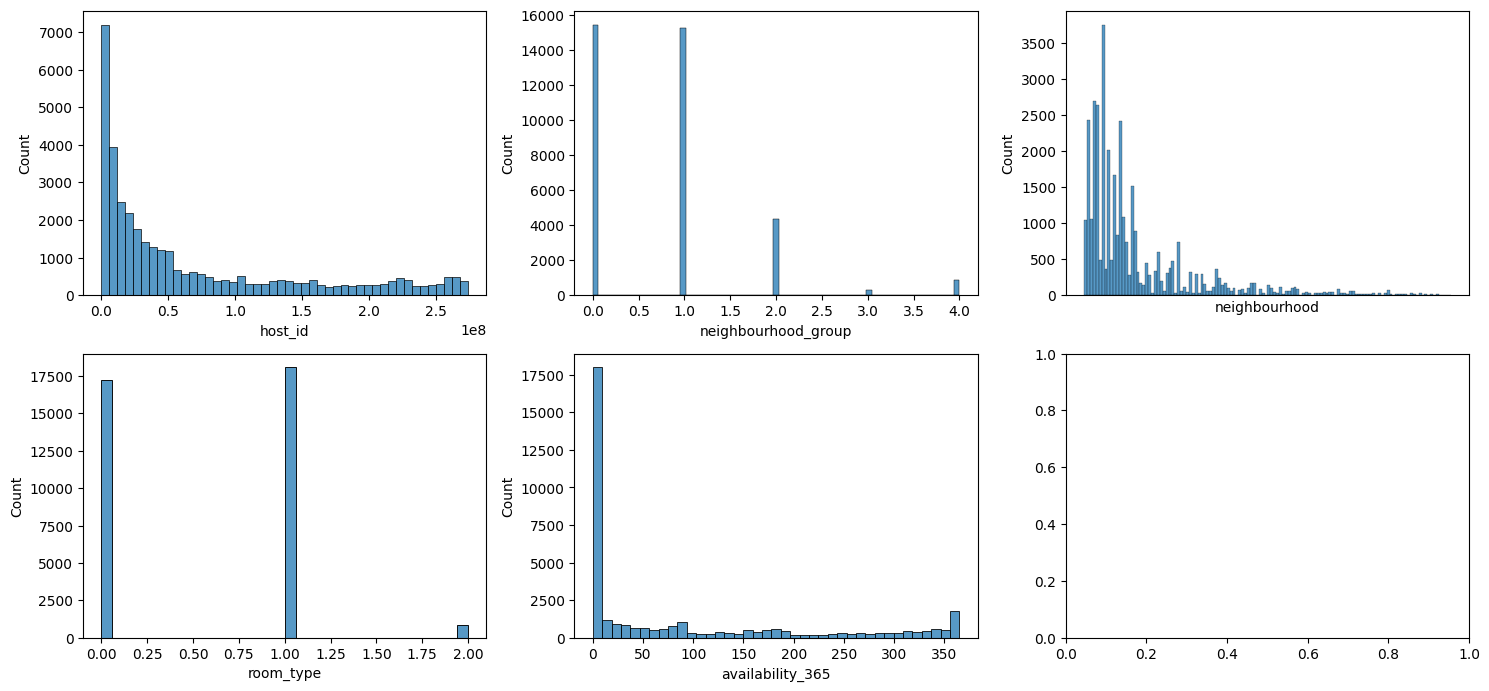

In [36]:
#Analisis de variables univariante 

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "host_id")
sns.histplot(ax = axis[0, 1], data = df, x = "neighbourhood_group")
sns.histplot(ax = axis[0, 2], data = df, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1, 0], data = df, x = "room_type")
sns.histplot(ax = axis[1, 1], data = df, x = "availability_365")

plt.tight_layout()

plt.show()
#Guardo plot
fig.savefig("../data/interim/1_variables_univariante.png")


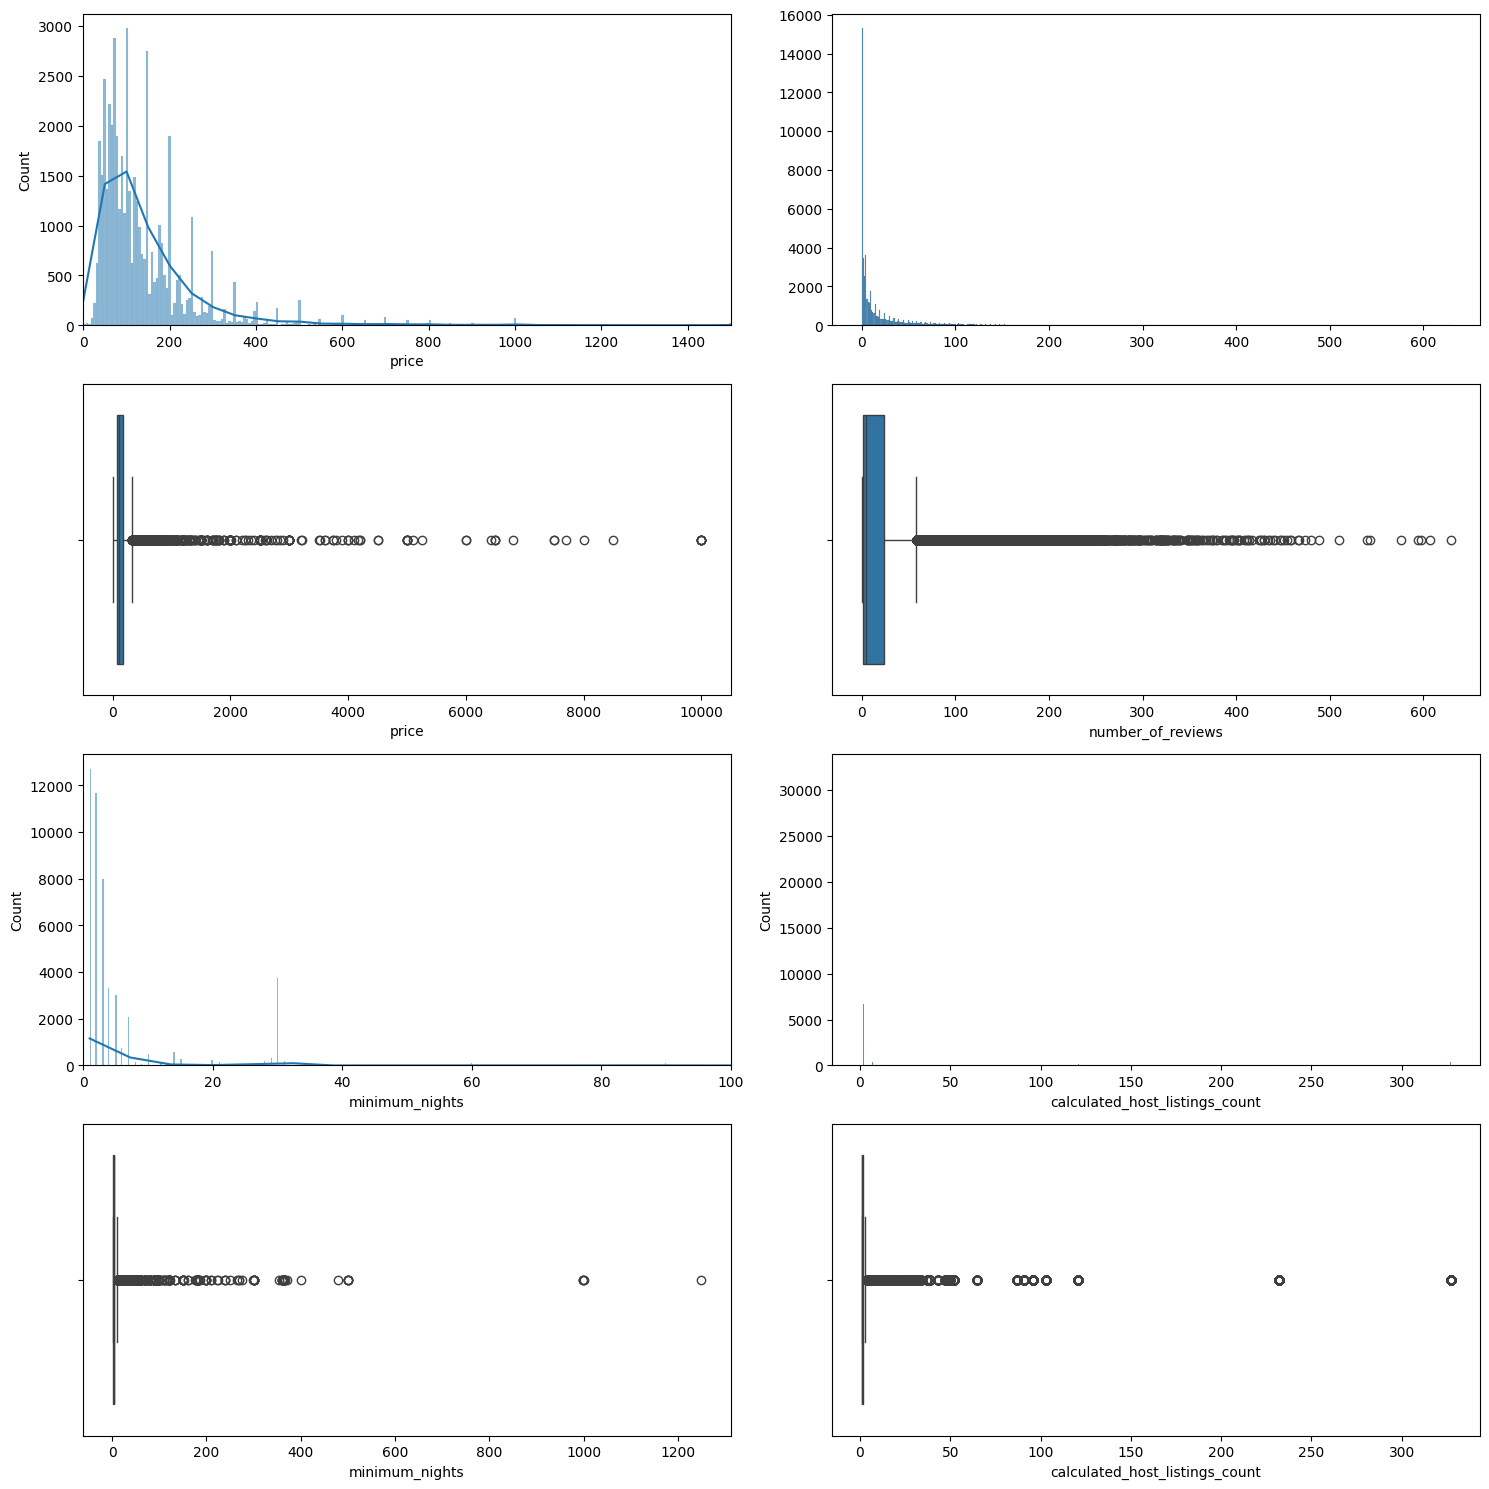

In [9]:
#Analisis de variables numericas

fig, axis = plt.subplots(4, 2, figsize = (15, 15))

sns.histplot(ax = axis[0, 0], data = df, x = "price", kde=True).set_xlim(0,1500)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")
sns.histplot(ax = axis[0, 1], data = df, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "number_of_reviews")
sns.histplot(ax = axis[2, 0], data = df, x = "minimum_nights", kde=True).set_xlim(0, 100)
sns.boxplot(ax = axis[3, 0], data = df, x = "minimum_nights")
sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()
#Guardo plot
fig.savefig("../data/interim/2_variables_numericas.png")

En minimum nights se observan unos valores atipicos que escapan por lejos de la media, es muy raro que alquien se tenga que alojar como minimo 1000 noches


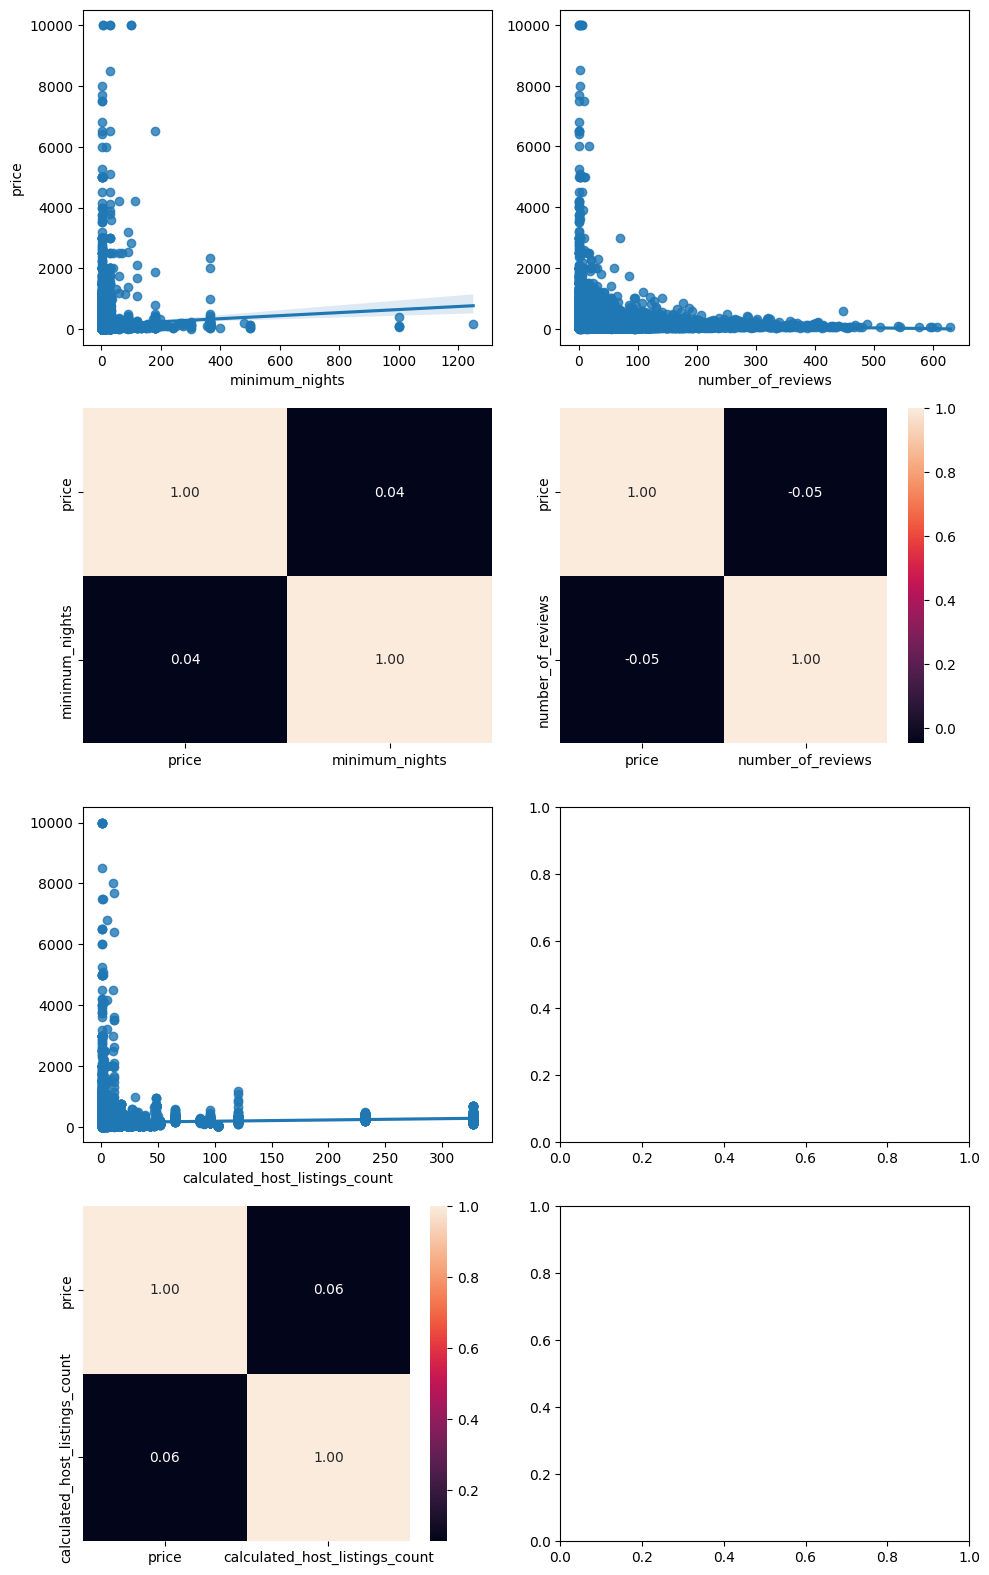

In [10]:
# Variables numericas 

fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

plt.tight_layout()
plt.show()

No se aprecia relacion entre el precio y el resto de los datos numericos comparados

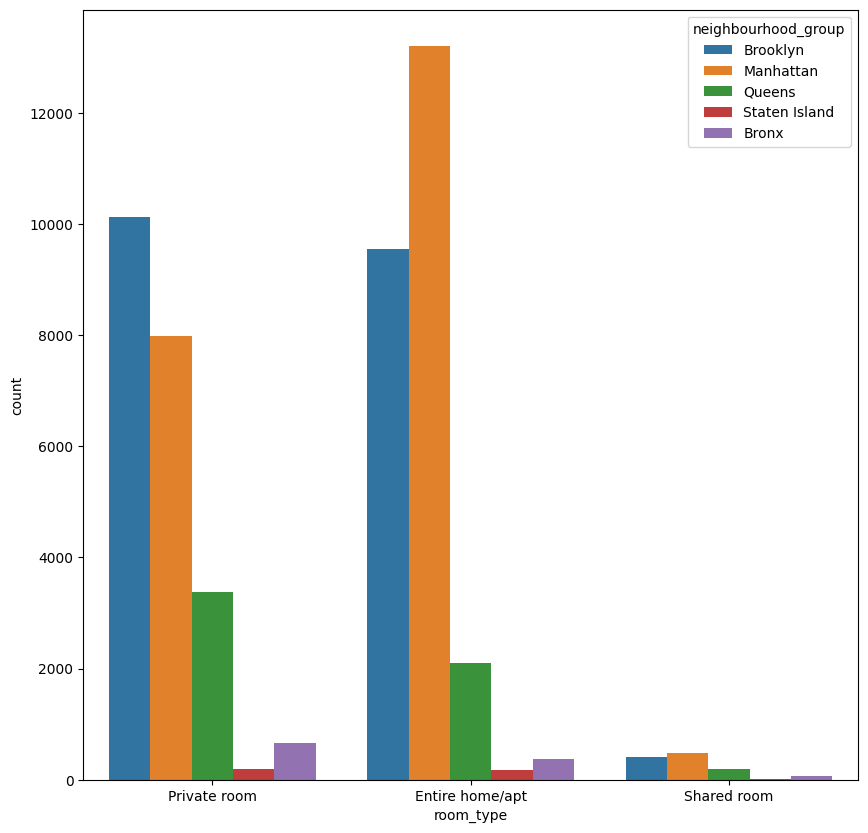

In [11]:
#Variables categoricas

fig, axis = plt.subplots(figsize = (10, 10))

sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

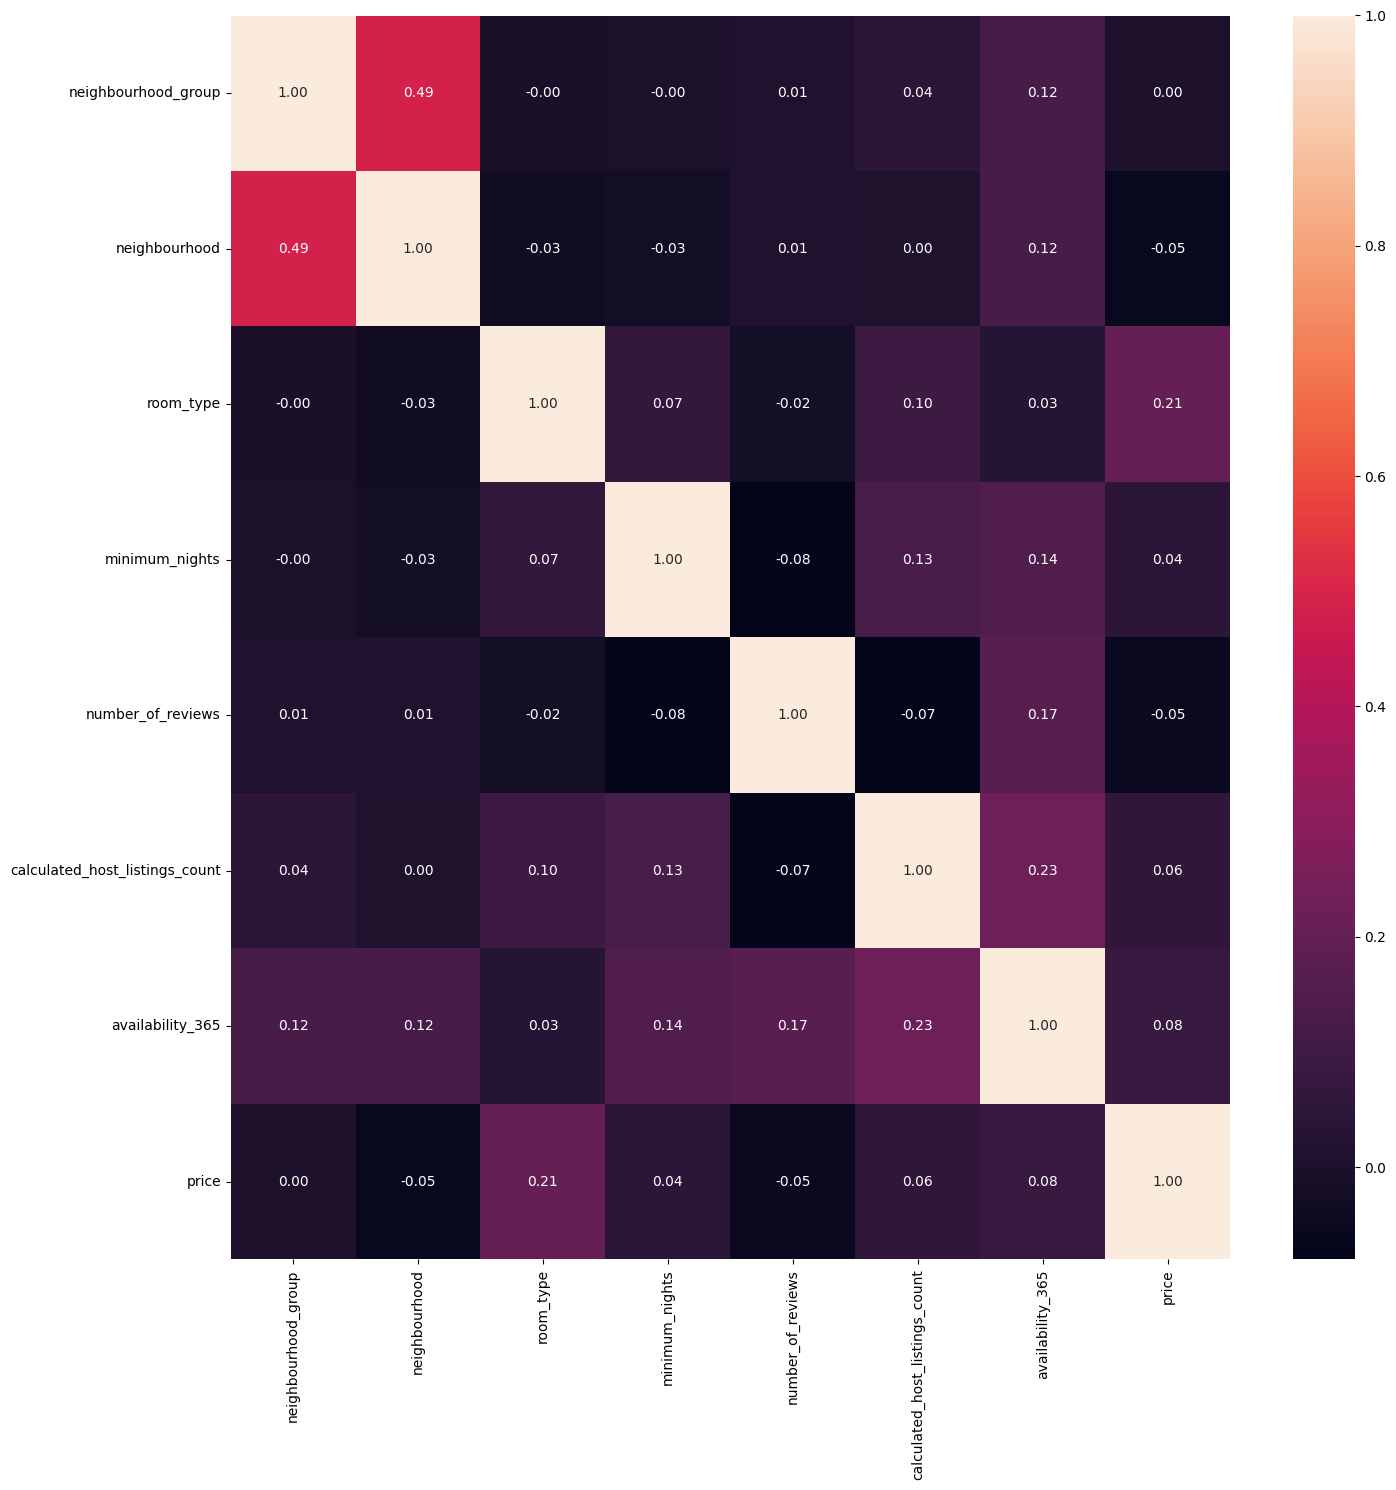

In [12]:
#Factorizo datos categoricos
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "minimum_nights","number_of_reviews", "calculated_host_listings_count", "availability_365", "price"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

La correlacion mas fuerte con relacion al precio se da con el tipo de habitacion, aunque no es muy fuerte. 
La otra es la de availability 365 y number of reviews. Lo que hace pensar que cuanta mas disponibilidad haya, mas veces la van a alquilar y por tanto va a tener mas reviews


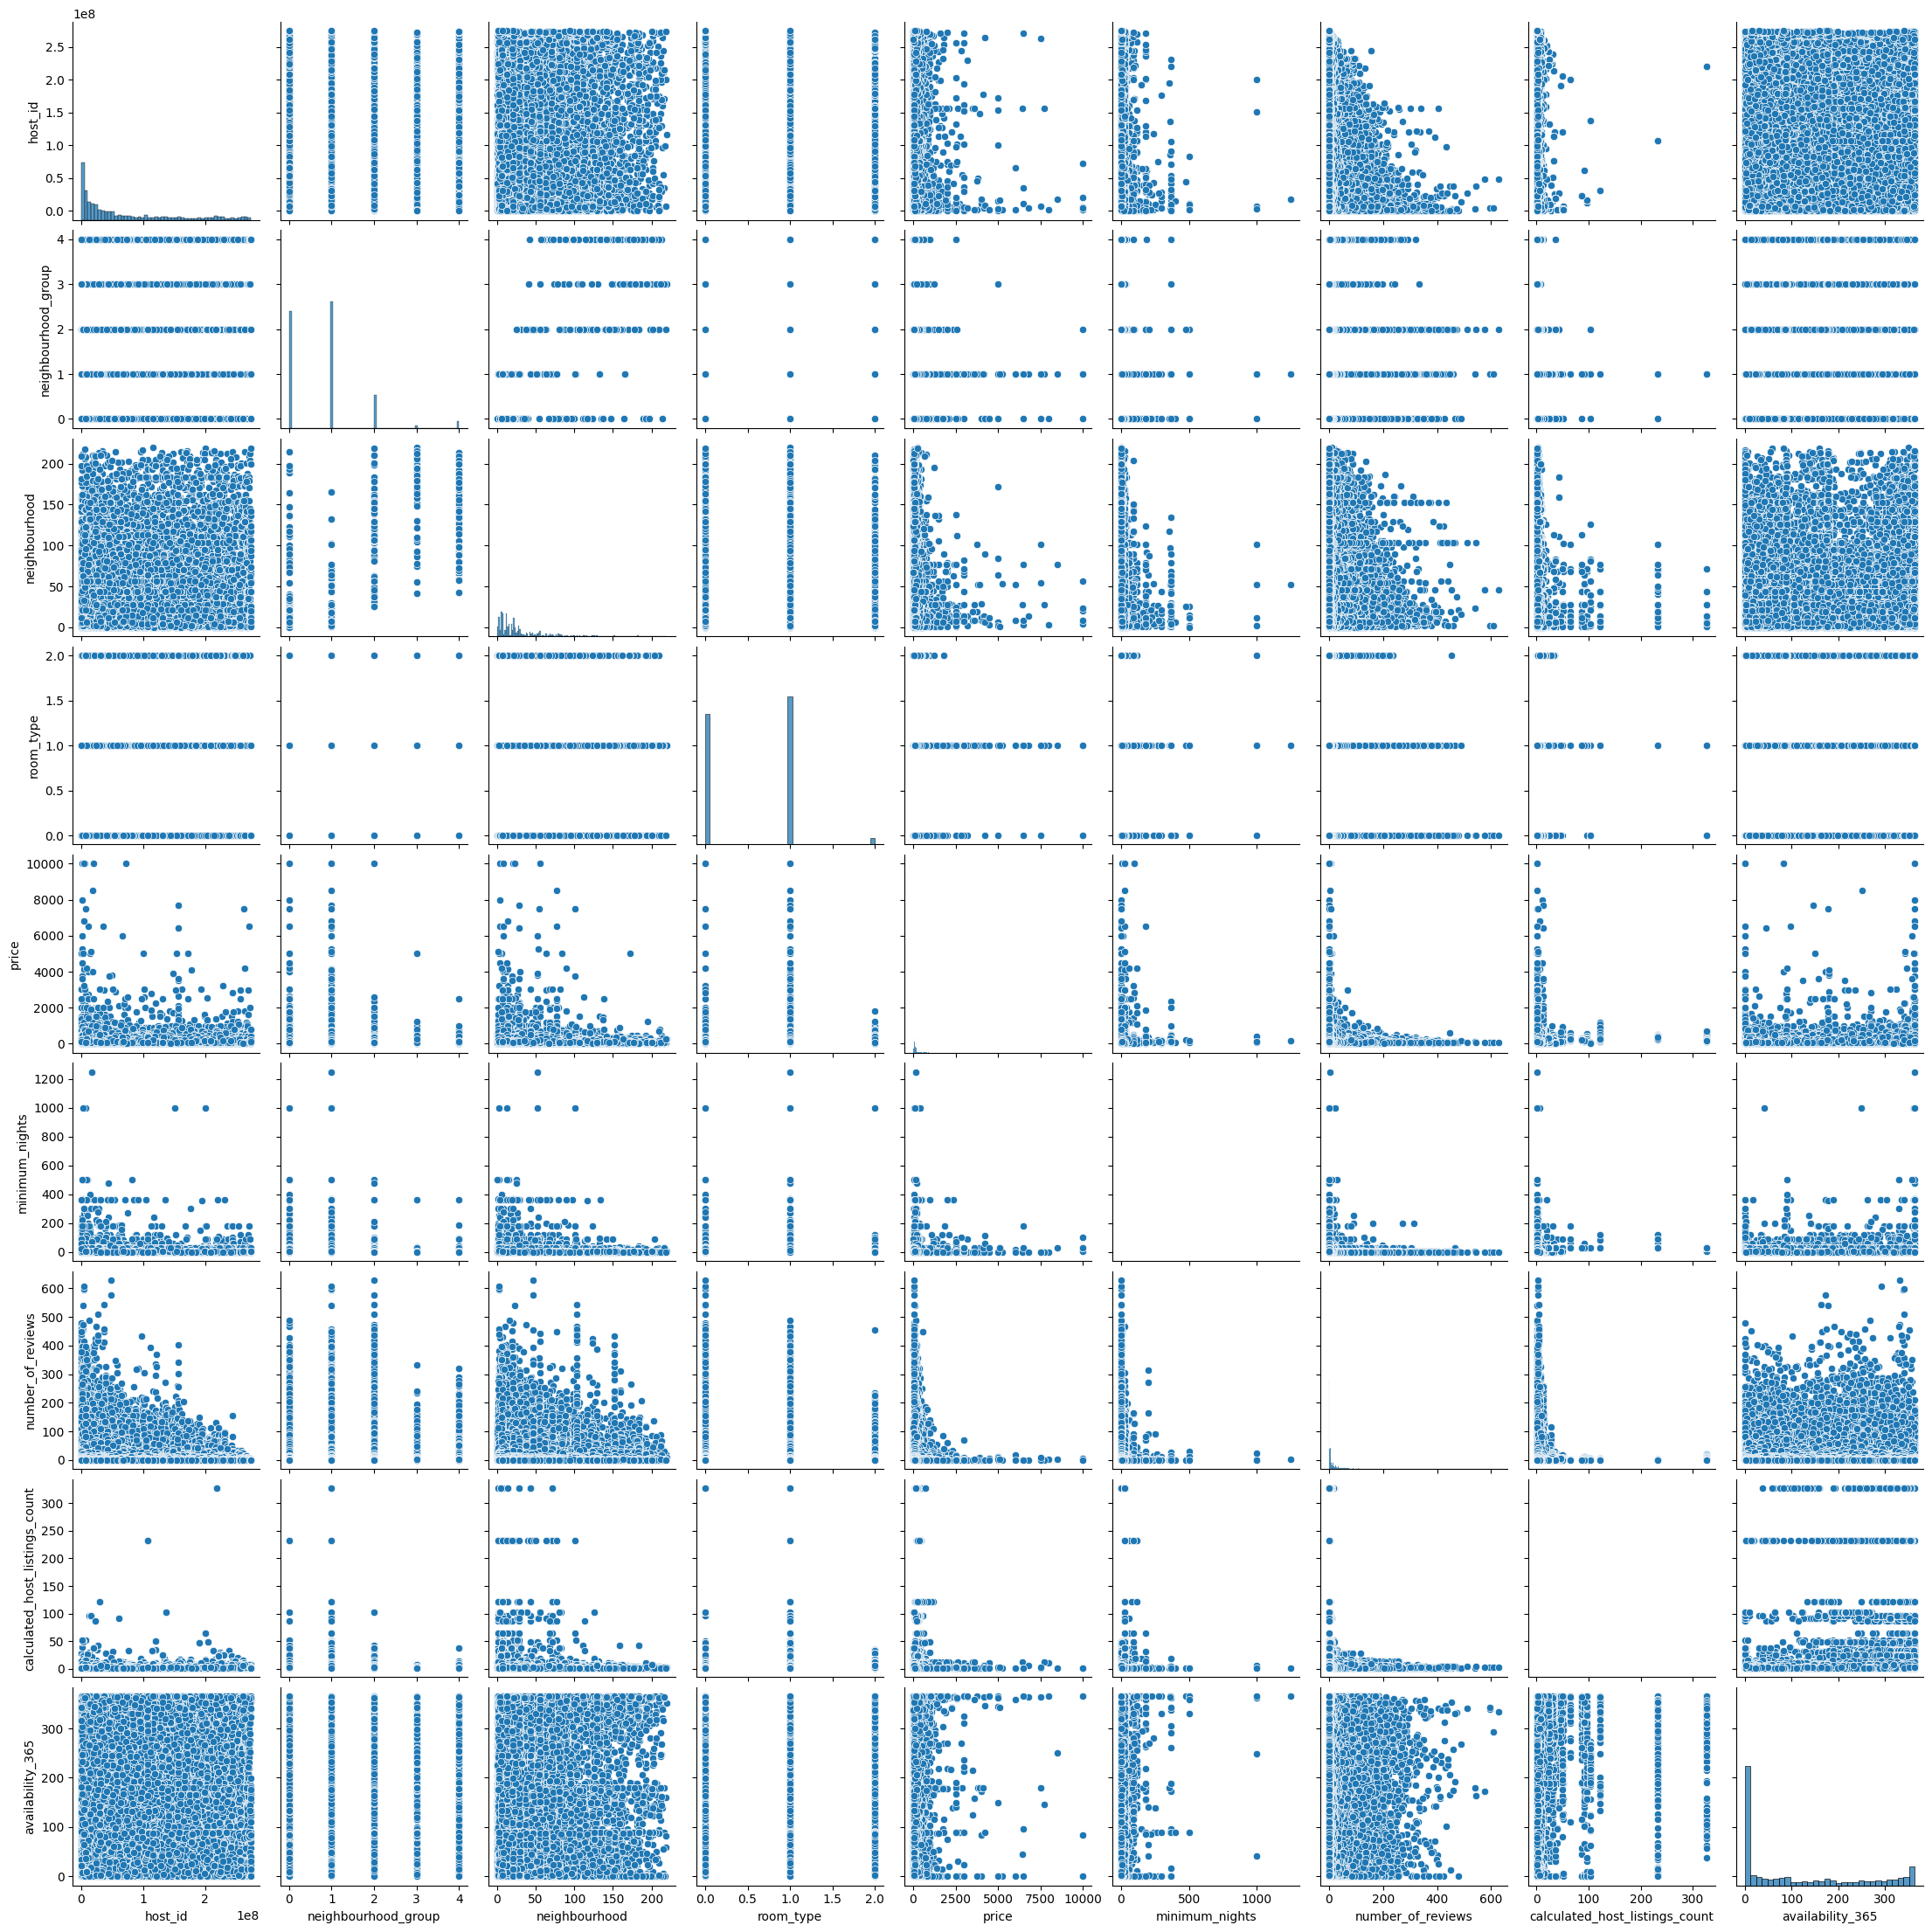

In [13]:
sns.pairplot(data = df)



In [14]:
df.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


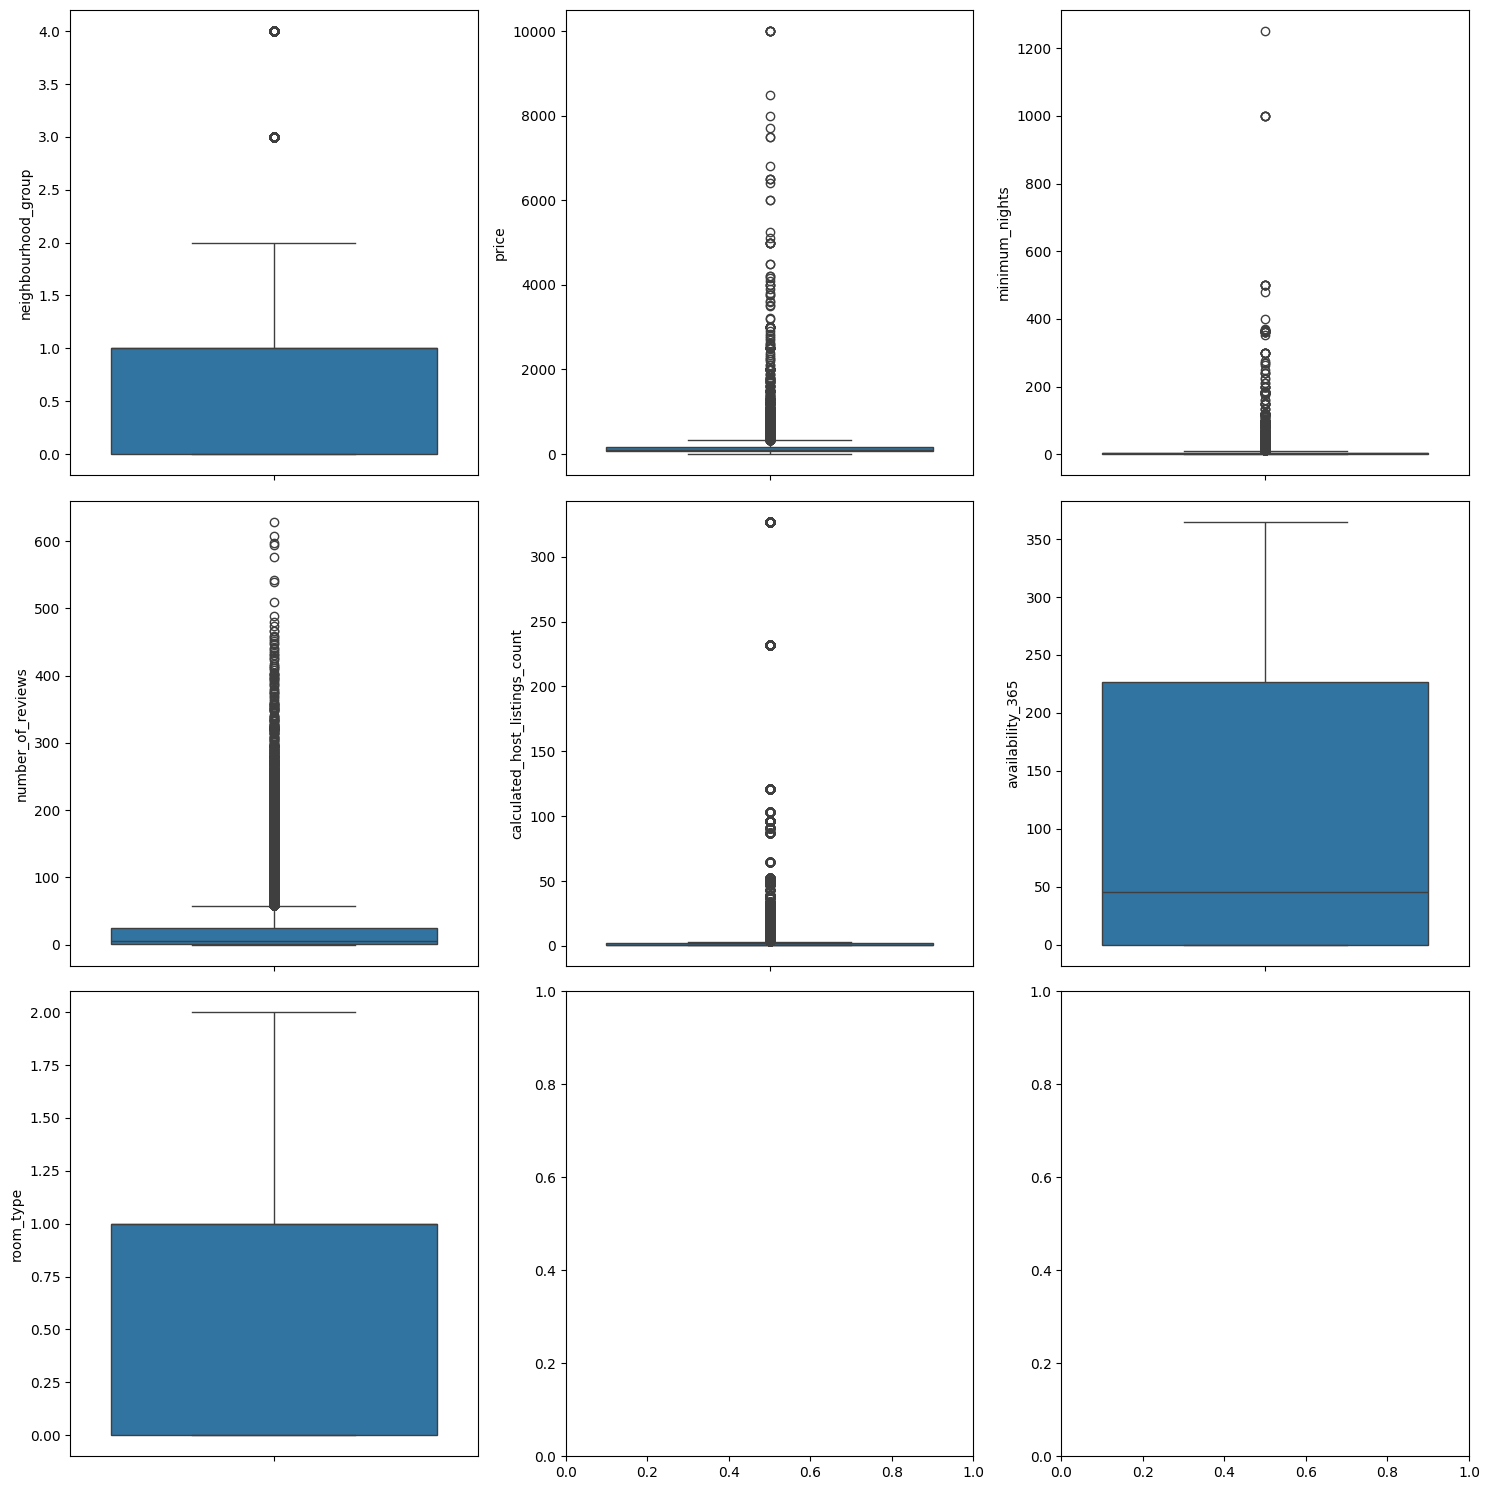

In [15]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df, y = "price")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df, y = "room_type")

plt.tight_layout()

plt.show()
fig.savefig("../data/interim/3_variables_categoricas.png")

In [16]:
price_stats = df['price'].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
iqr = price_stats["75%"] - price_stats["25%"]
limite_sup = price_stats["75%"] + 1.5 * iqr
limite_inf = price_stats["25%"] - 1.5 * iqr

print(f"Limite superior para outliers: {round(limite_sup, 2)} \nLimite inferior: {round(limite_inf, 2)}\nIQR: {round(iqr, 2)}")



Limite superior para outliers: 334.0 
Limite inferior: -90.0
IQR: 106.0


In [18]:
df = df[df["price"] > 0]

In [19]:
price_stats = df['price'].describe()

price_stats

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Verifico cual es el precio minimo y ahora tiene sentido 

In [20]:
min_nights_stats= df['minimum_nights'].describe()
min_nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

No tiene sentido que el minimo de noches para alojarse sea 1250 cuando la media es de 7. Procedo a encontrar el rango intercuartilico 

In [21]:
iqr_min_night= min_nights_stats["75%"] - min_nights_stats["25%"]
limite_sup_n= min_nights_stats['75%']+ 1.5*iqr_min_night
limite_inf_n= min_nights_stats['25%']- 1.5*iqr_min_night

print(f"Limite superior para outliers: {round(limite_sup_n, 2)} \nLimite inferior: {round(limite_inf_n, 2)}\nIQR: {round(iqr_min_night, 2)}")


Limite superior para outliers: 11.0 
Limite inferior: -5.0
IQR: 4.0


In [22]:
df = df[df["minimum_nights"] < 12]

<Axes: ylabel='minimum_nights'>

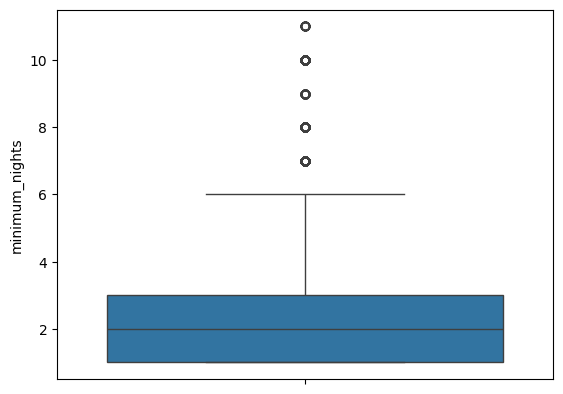

In [23]:
sns.boxplot(data=df['minimum_nights'])

In [24]:

review_stats = df["number_of_reviews"].describe()
review_stats

count    42279.000000
mean        25.633577
std         46.683294
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [25]:
iqr_review = review_stats["75%"] - review_stats["25%"]
limite_sup_r = review_stats["75%"] + 1.5 * iqr_review
limite_inf_r = review_stats["25%"] - 1.5 * iqr_review

print(f"Limite superior para outliers: {round(limite_sup_r, 2)} \nLimite inferior: {round(limite_inf_r, 2)}\nIQR: {round(iqr_review, 2)}")

Limite superior para outliers: 66.0 
Limite inferior: -38.0
IQR: 26.0


In [26]:
df= df[df["number_of_reviews"] < 66]

In [27]:
host_stats = df["calculated_host_listings_count"].describe()
host_stats

count    37108.000000
mean         3.578635
std         23.423670
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [28]:
iqr_host = df["calculated_host_listings_count"].describe()["75%"] - df["calculated_host_listings_count"].describe()["25%"]

limite_sup_h = df["calculated_host_listings_count"].describe()["75%"] + 1.5 * iqr_host
limite_inf_h = df["calculated_host_listings_count"].describe()["25%"] - 1.5 * iqr_host

print(f"Limite superior para outliers: {round(limite_sup_h, 2)} \nLimite inferior: {round(limite_inf_h, 2)}\nIQR: {round(iqr_host, 2)}")

Limite superior para outliers: 3.5 
Limite inferior: -0.5
IQR: 1.0


In [37]:
df= df[df["calculated_host_listings_count"] < 10]


In [38]:
#Conteo de valores nulos
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

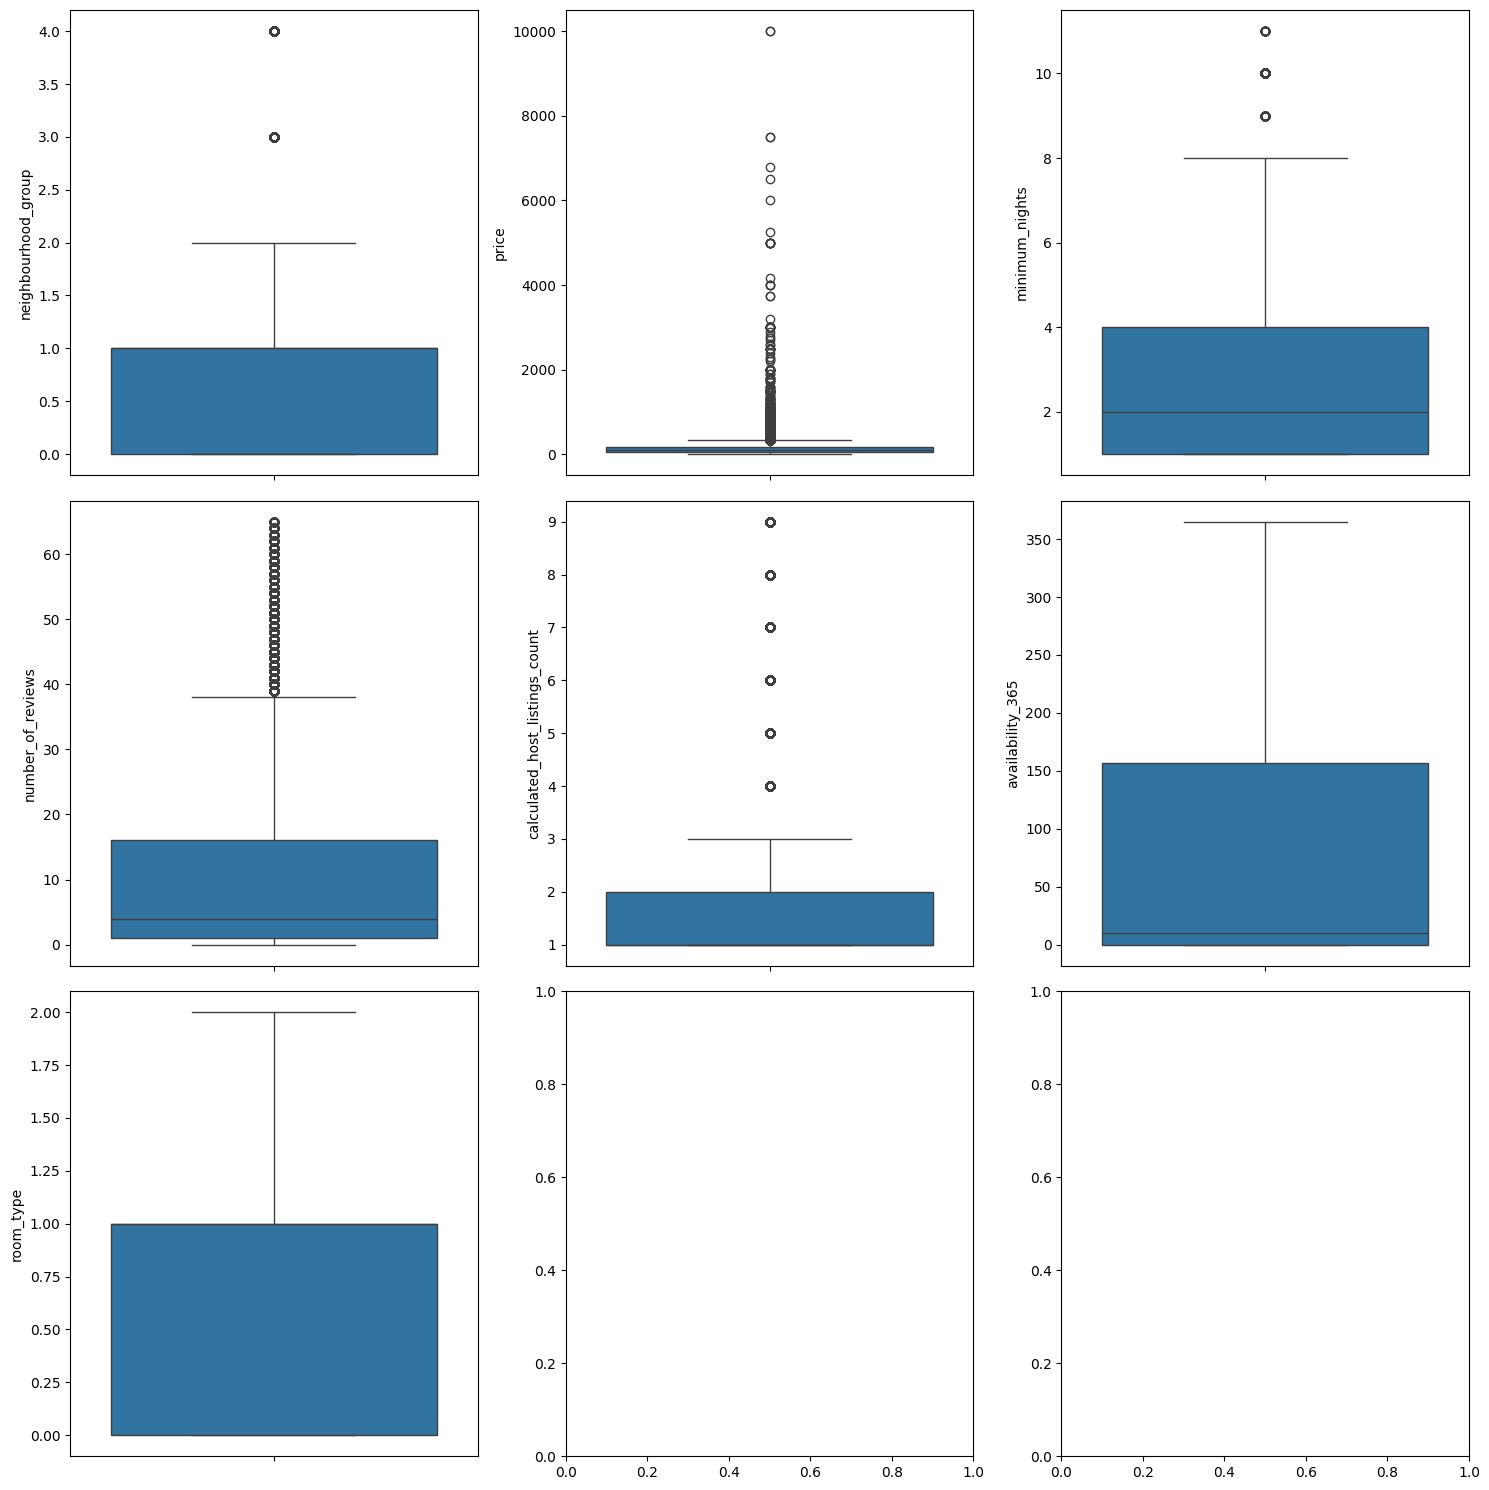

In [30]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df, y = "price")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df, y = "room_type")

plt.tight_layout()

plt.show()

In [31]:
#Guardo datos intermedios
df.to_csv("../data/interim/df.csv")

Repito las graficas para ver los datos tratados

In [32]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal["price"] = df["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.138462,0.0,0.625,1.000000,0.00,0.0,149
1,0.692308,0.0,0.125,0.972603,0.25,0.5,225
2,0.000000,0.2,0.000,1.000000,0.25,0.0,150
4,0.138462,0.9,0.000,0.000000,0.25,0.5,80
10,0.815385,0.4,0.000,0.016438,0.25,0.5,135


In [33]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,number_of_reviews,calculated_host_listings_count,availability_365,room_type
0,0.015385,0.0,0.000000,0.0
1,0.000000,0.0,0.000000,0.0
2,0.000000,0.0,0.194521,0.0
3,0.169231,0.0,0.649315,0.5
4,0.061538,0.0,0.000000,0.0


In [34]:
# Exportamos los datos

X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)